Table of content 
- [Introduction](#1)
- [The Halftoning Algorithm](#2)
- [Utility functions](#3)
  

<h1 style="color:salmon" id="1">Introuduction</h1>

-  Black and white printers put gray shade images on paper via the presence or absence of black ink on paper.
-  Printers do not contain ink with varying shades of gray.
-  These black and white output devices create the <span style="color:red">**illusion of shades of gray via haltoning.**</span>
-  Halftoning : converts an image of gray scale $\rarr$ to an image containing 0s and 1s only.
   -  halftoning breaks down an image into a grid of dots. 
   -  The human eye blends these dots to perceive a continuous image with gradients and shades
      -  even though it’s actually composed of discrete dots.
-  Dots that make optical illusion of shades and gradients, these dots may vary in the size.
- Applications 
  - Print Media 🖨️ 
  - Digital Displays (e-ink)
>Halftoning is essential for reproducing images where continuous tone is impossible, and it provides a balance between quality and resource efficiency, especially in printing.

>halftone process reduces visual reproductions to an image that is printed with only one color of ink, in dots of differing size (pulse-width modulation) or spacing (frequency modulation) or both.

<h1 style="color:salmon" id="2">The Halftoning Algorithm</h1>

- The basis of the halftoning algorithm is an **Error Diffusion Technique** 
- When the error reach a certin value, turn a pixel on and reset the error.
- if the error not great enough leave the pixel truned off.
- Error resulting from approximating a gray shade image with only ones and zeros.
- so simple Halftoning algorithm just assign the pixel to 1 or 0 white or black based on a threshold that is $\large \frac{255}{2}=128$
- Advanced halftoning distribute the error using 
  - <span style="color:lightgreen">**Floyd-Steinberg Dithering**</span>
    - 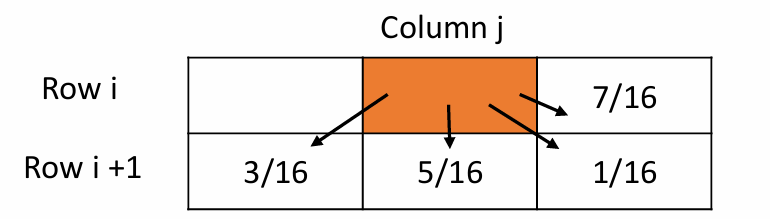
    - Right pixel: 7/16 of the error
    - Bottom-left pixel: 3/16 of the error
    - Bottom pixel: 5/16 of the error
    - Bottom-right pixel: 1/16 of the error
  - <span style="color:lightgreen"> Jarvis, Judice, and Ninke (JJN) Dithering </span>
    - Distributes the error across a larger neighborhood (12 pixels instead of Floyd-Steinberg’s 4).
    - Provides smoother gradients but can be more computationally intensive
  - <span style="color:lightgreen"> Ordered Dithering (Using a Dithering Matrix)</span>
    - Involves using a matrix (e.g., Bayer matrix) that repeats across the image.
    - Each pixel is compared against the value in the matrix, which determines if it should be black or white.
  - <span style="color:lightgreen"> Random Dithering (Stochastic Dithering)</span>
    - Each pixel is compared to a randomly generated threshold.
    - Fast and straightforward but can introduce noise.

  
```  
1. For each pixel in the image (left to right, top to bottom):
    a. Calculate the "old_pixel" value (current grayscale value of the pixel, between 0 and 255).
    b. Determine the "new_pixel" value by setting it to either black (0) or white (255):
       - If old_pixel >= 128, set new_pixel to 255 (white).
       - Otherwise, set new_pixel to 0 (black).
       
    c. Calculate the "quantization error":
       - error = old_pixel - new_pixel

    d. Diffuse the error to neighboring pixels that haven’t been processed yet:
       - Distribute the error to adjacent pixels using Floyd-Steinberg weights:
         - Pixel to the right: image[x + 1][y]   += error * 7/16
         - Pixel to the bottom-left: image[x - 1][y + 1] += error * 3/16
         - Pixel directly below: image[x][y + 1] += error * 5/16
         - Pixel to the bottom-right: image[x + 1][y + 1] += error * 1/16

2. Repeat for all pixels in the image.
```



<h1 style="color:salmon" id="3">Utility functions</h1>


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

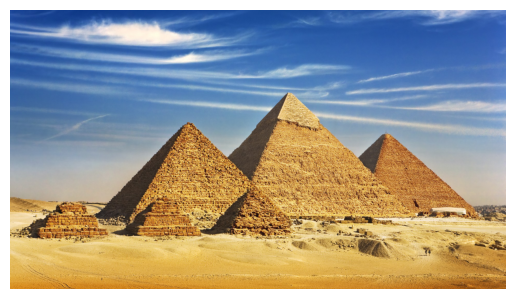

In [7]:
# reading the image
img_path = "../images/pyramid.jpg"
img = mpimg.imread(img_path)
# display
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# printing the image array 
print(f"Type of image data structure: {type(img)}")
print(f"Shape of the image: {img.shape}")
# to acces a specic pixel image[row,cols]
img[1,1]
# that mean the pixel in this coordinates consist of three values (R, G, B)

Type of image data structure: <class 'numpy.ndarray'>
Shape of the image: (1080, 1920, 3)


array([ 30,  68, 153], dtype=uint8)

In [25]:
img[..., :3].shape

(1080, 1920, 3)

In [44]:
img[:,:, :3].shape

(1080, 1920, 3)

Luminosity Method (Weighted Average)
>This method converts an RGB image to grayscale by calculating a weighted sum of the R, G, and B channels. The weights are chosen based on the **perception that humans are more sensitive to <span style="color:green">green</span> and less sensitive to <span style="color:blue">blue</span>.** The typical weights used are:
> **- <span style="color:red"> R : 0.2989 </span>, <span style="color:green"> G : 0.5870 </span>, <span style="color:blue"> B : 0.1140</span>**

$$
\huge I = \red{R * 0.2989} + \green{G *  0.5870} + \blue{B * 0.1140} 
$$

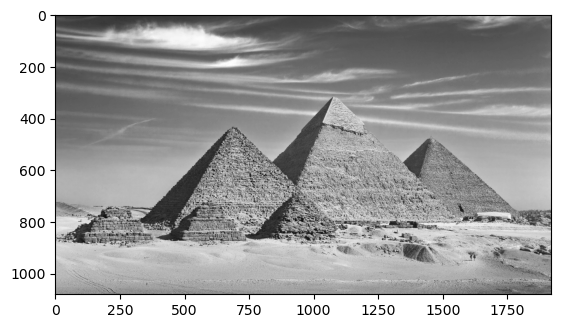

In [46]:
# function that turn the image to gray scale 
def RGB_to_gray(image):
    # we can use this but some images may have a fourth channel 
    # return np.dot(img, [0.2989, 0.5870, 0.1140])
    # but using img[..., :3] or img[:, :, :3] is taking care of this possibility 

    return np.dot(img[:, :, :3], [0.2989, 0.5870, 0.1140])
plt.imshow(RGB_to_gray(img), cmap='gray');